MS0240 Mathematics for AI
# Housing Price Prediction

|            Name          |    Admin No.   |        Class      |
|--------------------------|----------------|-------------------|
|   Timothy Chia Kai Lun   |    P2106911    |   DAAA/FT/2A/02   |

In [1]:
import math
import numpy as np 
import pandas as pd 
import sympy as sp 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
df = pd.read_csv('housing_price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   inverse age of flat (year-1)                        30 non-null     float64
 1   inverse distance to the nearest MRT station (km-1)  30 non-null     float64
 2   price per square metre ($ in thousands)             30 non-null     float64
dtypes: float64(3)
memory usage: 848.0 bytes


## Simple Linear Regression

### Model 1:  SLR with intercept $a$ fixed => $\hat{y} = bx_i$

$x$ (independent var) = inverse distance to the nearest MRT station <br>
$y$ (dependent var) = price per square metre 

a) Express Error function $E(b)$ in terms of $b$ only.  Hence, derive $E'(b)$.

In [4]:
x, y, b, i= sp.symbols('x_i y_i b i') # symbols for x, y, b, i
n = len(df)

In [5]:
# Expressing error function, E(b), in terms of b with sympy
E_b = 1/n * sp.Sum((y - (b * x))**2, (i, 1, n)) # error function
E_b

0.0333333333333333*Sum((-b*x_i + y_i)**2, (i, 1, 30))

In [6]:
first_derivative = sp.diff(E_b, b) # first derivative of E(b) wrt b
first_derivative # E'(b)

0.0333333333333333*Sum(-2*x_i*(-b*x_i + y_i), (i, 1, 30))

b) Use univariate gradient descent algorithm to find the value of $b$ for which $E(b)$ is at its minimum.

In [7]:
x = df['inverse distance to the nearest MRT station (km-1)'] # independent variable
y = df['price per square metre ($ in thousands)'] # dependent variable

In [8]:
b = 2 # initial value for b
alpha = .001 # learning rate
epsilon = .0001# convergence criteria
diff = 1 # difference between previous and current value of b
max_iter = 1000 # maximum number of iterations
counter = 1 # counter for number of iterations

E = lambda b : 1/n * sum((y - b * x)**2) # error function
E_prime = lambda b: 1/n * sum(-2*x*(y - b * x)) # derivative of error function

while diff > epsilon and counter < max_iter:
    b_new = b - alpha * E_prime(b) # new value of b
    diff = abs(b_new - b) # update difference between previous and current value of b
    counter += 1 # increment counter
    b = b_new # update value of b

print(f'Converged at iteration {counter} with b = {b} and E(b) = {E(b)}')

Converged at iteration 66 with b = 0.8139530967241675 and E(b) = 19.467139823913634


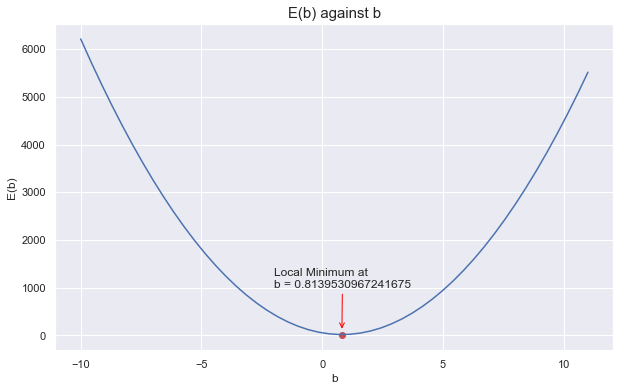

In [9]:
b_values = np.linspace(-10, 11, 50) # values of b to be plotted
error_func = [E(b) for b in b_values] # values of error function for each value of b

plt.figure(figsize=(10,6))
plt.plot(b_values, error_func) # plot error function against b

plt.scatter(b, 0, color='r', alpha=1) # location of local minimum
plt.annotate(text=f'Local Minimum at\nb = {b}', xy=(b, 100), xytext=(-2, 10**3), size=12, 
                arrowprops=dict(arrowstyle="->", color='red'))
                
plt.xlabel('b')
plt.ylabel('E(b)')
plt.title('E(b) against b', size=15)
plt.show()

c) Describe the changes and decisions you made on the parameters for your solution to reach convergence.

- I set the initial value for $b$ to be an arbitrary number such as 2 and after a few iterations I noticed $E(b)$ would always converge near the 1. to .8 range. Because to initial value was close to the convergence point, I left it as is. 
- I set the learning rate $\alpha$ to be a small value like 0.001 as although convergence would take longer (more iterations required), it would still be guaranteed.
- I chose convergence as the stopping criteria, that is, the update to the current point does not differ much from the previous point. The convergence criteria $\epsilon$ was set to a random number such as 0.0001
- I chose to perform gradient descent with 1000 iterations as I thought it would take longer to converge due to the small learning rate. However, this was not the case as convergence was reached at 66th iteration.

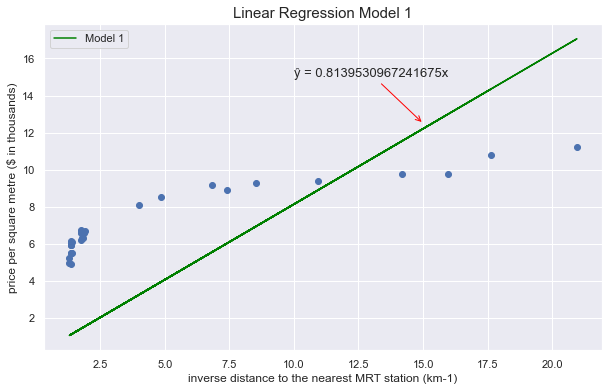

In [10]:
m1_y_hat =  b * x # predicted values of y for each value of x

plt.figure(figsize=(10, 6))
plt.scatter(x, y)

plt.plot(x, m1_y_hat, color='green', alpha=1, label='Model 1') # plot of regression line
plt.annotate(text=f'ŷ = {b}x', xy=(15, 12.5), xytext=(10, 15), 
                size=13, arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('inverse distance to the nearest MRT station (km-1)')
plt.ylabel('price per square metre ($ in thousands)')
plt.title('Linear Regression Model 1', size=15)
plt.legend()
plt.show()

In [11]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y - y_bar)**2).sum()
    ss_res = ((y - y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

def rmse(y, y_hat):
    mse = ((y - y_hat)**2).mean()
    return math.sqrt(mse)

model_1_rmse = rmse(y, m1_y_hat) # RMSE for model 1
model_1_r2 = r_squared(y, m1_y_hat) # R^2 for model 1

print(f"RMSE value for model 1 is: {model_1_rmse}")
print(f"R-squared value for model 1 is: {model_1_r2}")

RMSE value for model 1 is: 4.41215818210472
R-squared value for model 1 is: -5.118265403260532


### Model 2:  SLR  => $\hat{y} = a + bx_i$

a) Express Error function $E(a,b)$ in terms of a and b.  Hence, derive $E_a(a,b)$ and $E_b(a,b)$.

In [12]:
x, y, a, b, i= sp.symbols('x_i y_i a b i') # symbols for x, y, a, b, i
n = len(df) # number of observations

E_ab = 1/n * sp.Sum((y - (b*x + a))**2, (i, 1, n)) # error function in terms of a and b
E_ab

0.0333333333333333*Sum((-a - b*x_i + y_i)**2, (i, 1, 30))

In [13]:
Epartial_a = sp.diff(E_ab, a) # Partial derivative of E(a, b) wrt a
Epartial_a

0.0333333333333333*Sum(2*a + 2*b*x_i - 2*y_i, (i, 1, 30))

In [14]:
Epartial_b = sp.diff(E_ab, b) # Partial derivative of E(a, b) wrt b
Epartial_b

0.0333333333333333*Sum(-2*x_i*(-a - b*x_i + y_i), (i, 1, 30))

b) Use gradient descent algorithm to find the values of a and b for which $E(a,b)$ is at its minimum.  

In [15]:
x = df['inverse distance to the nearest MRT station (km-1)'] # independent variable
y = df['price per square metre ($ in thousands)'] # dependent variable

In [16]:
a = 5 # initial point for a
b = 1 # initial point for b

alpha = .005 # learning rate
epsilon = .0001# convergence criteria
max_iter = 1000 # maximum number of iterations

E = lambda a, b : 1/n * sum((y - (b * x + a))**2) # error function
partial_a = lambda a, b : 1/n * sum(2*a + 2*b*x - 2*y) # partial derivative of error function wrt a
partial_b = lambda a, b : 1/n * sum(-2*x * (-a - b*x + y)) # partial derivative of error function wrt b

initial_func = E(a, b) # initial function value

for i in range(max_iter):
    current_a = a # current value of a
    current_b = b # current value of b
    current_func = initial_func # current function value

    a = a - alpha * partial_a(current_a, current_b) # update of a
    b = b - alpha * partial_b(current_a, current_b) # update of b
    next_func = E(a, b) # new function value
    
    partial_norm = partial_a(current_a, current_b)**2 + partial_b(current_a, current_b)**2 

    if (partial_norm < epsilon):
        print(f'Converged at iteration {i+1}  a = {a}  b = {b}  E(a,b) = {next_func}')
        break
    elif (i == max_iter-1):
        print(f'\nNot converged after {max_iter} iterations')

Converged at iteration 791  a = 5.737532032856144  b = 0.2994946340411714  E(a,b) = 0.46213296530418185


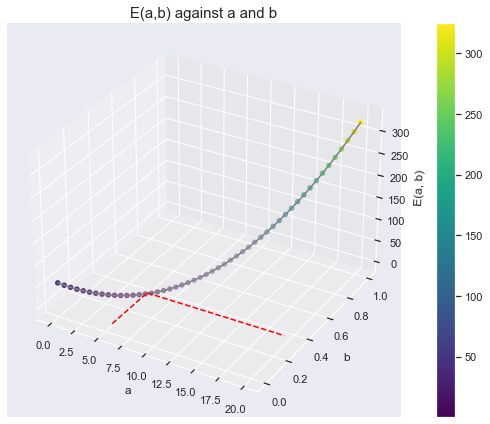

In [17]:
a_values = np.linspace(0, 20, 50) # values of a to be plotted
b_values = np.linspace(0, 1, 50) # values of b to be plotted
error_func = [E(a, b) for a, b in zip(a_values, b_values)] # values of error function for each value of a and b

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

g = ax.scatter3D(xs=a_values, ys=b_values, zs=error_func, c=error_func, cmap='viridis')
ax.plot3D(a_values, b_values, error_func, 'gray')

ax.plot([a, a], [0, b], [0, 0], color='red', linestyle='--') 
ax.plot([a, 20], [b, b], [0, 0], color='red', linestyle='--')

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E(a, b)')

fig.colorbar(g, ax=ax)
plt.title('E(a,b) against a and b', size=15)
plt.tight_layout()
plt.show()

c)	Describe the changes and decisions you made on the parameters for your solution to reach convergence.

- After trying different initials points for $a$ and $b$, I noticed the function would always converge near $a$ ≈ 5 and $b$ ≈ 0. Which is why I set the initial points as such so that the number of iterations it would take to converge would be lesser.
- For the learning rate $\alpha$, after a few tries setting $\alpha$ to > 0.01 I noticed that the function would not converge even after 1000 iterations. Hence, I set the learning rate to be a smaller value of $\alpha=0.005$ 
- For the stopping criteria, I checked if $E_a^{2}(a_n,b_n)+E_b^{2}(a_n,b_n) < \epsilon=0.0001$. 
- As for number of iterations, I set it to 1000 to account for the slower convergence due to the smaller $\alpha$ value.

### Conclusion on Simple Linear Regression

a) Using Python (or other software), in a single figure, plot the data points (scatterplot) together with the linear lines representing the two models.  Insert the figure below and describe what you observe regarding the location of the data and the linear lines.

#### <u>Observations</u>

- I noticed that the regression line of model 2 has rotated clockwise slightly and looks better fitted to each datapoint compared to model 1.
- This is due to taking into account the y-intercept as well as gradient values when building the simple linear regression model.
- We are able to get the optimal of a and b through gradient descent by finding the local minimum values of E(a,b) wrt to a and b.
- By caculating the prediction errors, model 2 has a Root Mean Squared Error of 0.6798036226030145, meaning the datapoints are concentrated around the regression line.
- Model 2 has an $R^2$ score of 0.854757701495856, which means that about 86% of the variance in the dependent variable that can be explained by the independent variable.

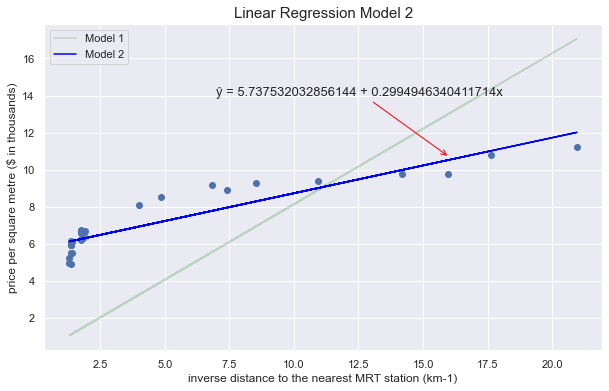

In [18]:
m2_y_hat = b*x + a # predicted values of y for each value of x

plt.figure(figsize=(10, 6))
plt.scatter(x, y)

plt.plot(x, m1_y_hat, color='green', alpha=.2, label='Model 1') # plot of model 1's regression line
plt.plot(x, m2_y_hat, color='blue', alpha=1, label='Model 2') # plot of model 2's regression line

plt.annotate(text=f'ŷ = {a} + {b}x', xy=(16, 10.7), xytext=(7, 14), size=13, arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('inverse distance to the nearest MRT station (km-1)')
plt.ylabel('price per square metre ($ in thousands)')
plt.title('Linear Regression Model 2', size=15)

plt.legend()
plt.show()

b) In a linear regression model, the constant $a$ is commonly interpreted as the value of the response variable when the predictor variable is zero. In your Model 2, can you interpret your value of $a$ as such? Explain.

- For model 1 when `inverse distance to the nearest MRT station (km-1)`$=0$, $\alpha=0$ 
- For model 2 when `inverse distance to the nearest MRT station (km-1)`$=0$, $\alpha=5.737532032856144$.
- Meaning `price per square metre ($ in thousands)`$=5.737532032856144$ when `inverse distance to the nearest MRT station (km-1)`$=0$.

In [19]:
model_2_rmse = rmse(y, m2_y_hat) # RMSE for model 2
model_2_r2 = r_squared(y, m2_y_hat) # R^2 for model 2

print(f"RMSE value for model 2 is: {model_2_rmse}")
print(f"R-squared value for model 2 is: {model_2_r2}")

RMSE value for model 2 is: 0.6798036226030145
R-squared value for model 2 is: 0.854757701495856


## Multiple Linear Regression

### Model 3: MLR => $\hat{y} = a + bx_i + cw_i$

a) Explain how gradient descent algorithm can be extended for model 3.

- Currently for model 2, the error function $E(a,b)$ only takes into account 2 variables, however this can be extended for model 3 with an additional variable $c$, which refers to the gradient of the third predictor variable (in this case is `inverse age of flat (year-1)`).
- By using gradient descent of find optimal values for $a$(y-intercept), $b$(gradient of first predictor), and $c$(gradient of second predictor), we are able to obtain the minimum $E(a,b,c)$ values. Hence find the best fit line with the two predictor variables.

In [20]:
x, y, w, a, b, c, i= sp.symbols('x_i w_i y_i a b c i') # symbols for x, y, w, a, b, c, i
n = len(df) # number of observations

# Expressing error function, E(a,b,c), in terms of a, b, and c with sympy
E_abc = 1/n * sp.Sum((y - (a + b*x + c*w))**2, (i, 1, n)) 
E_abc

0.0333333333333333*Sum((-a - b*x_i - c*y_i + w_i)**2, (i, 1, 30))

In [21]:
Epartial_a = sp.diff(E_abc, a) # Partial derivative of E(a, b, c) wrt a
Epartial_a

0.0333333333333333*Sum(2*a + 2*b*x_i + 2*c*y_i - 2*w_i, (i, 1, 30))

In [22]:
Epartial_b = sp.diff(E_abc, b) # Partial derivative of E(a, b, c) wrt b
Epartial_b

0.0333333333333333*Sum(-2*x_i*(-a - b*x_i - c*y_i + w_i), (i, 1, 30))

In [23]:
Epartial_c = sp.diff(E_abc, c) # Partial derivative of E(a, b, c) wrt c
Epartial_c

0.0333333333333333*Sum(-2*y_i*(-a - b*x_i - c*y_i + w_i), (i, 1, 30))

b) Use gradient descent algorithm to find the values of $a$, $b$ and $c$ for which Error function is at its minimum.  

In [24]:
w = df['inverse age of flat (year-1)'] # independent variable
x = df['inverse distance to the nearest MRT station (km-1)'] # independent variable
y = df['price per square metre ($ in thousands)'] # dependent variable

In [25]:
a = 6 # initial point for a
b = 1 # initial point for b
c = 0 # initial point for c

alpha = .008 # learning rate
epsilon = .1# convergence criteria
max_iter = 1000 # maximum number of iterations

E = lambda a, b, c: 1/n * sum((-a - b*x - c*y + w)**2) # error function
partial_a = lambda a, b, c : 1/n * sum(2*a + 2*b*x + 2*c*y - 2*w) # partial derivative of error function wrt a
partial_b = lambda a, b, c : 1/n * sum(-2*x * (-a - b*x - c*y + w)) # partial derivative of error function wrt b
partial_c = lambda a, b, c : 1/n * sum(-2*y * (-a - b*x - c*y + w)) # partial derivative of error function wrt c

initial_func = E(a, b, c) # initial function value

for i in range(max_iter):
    current_a = a # current value of a
    current_b = b # current value of b
    current_c = c # current value of c
    current_func = initial_func # current function value

    a = a - alpha * partial_a(current_a, current_b, current_c) # update of a
    b = b - alpha * partial_b(current_a, current_b, current_c) # update of b
    c = c - alpha * partial_c(current_a, current_b, current_c) # update of c
    next_func = E(a, b, c) # new function value

    partial_norm = partial_a(current_a, current_b, current_c)**2 + partial_b(current_a, current_b, current_c)**2 + partial_c(current_a, current_b, current_c)**2

    if (partial_norm < epsilon):
        print(f'Converged at iteration {i+1}   a = {a}  b = {b} c = {c}  E(a,b,c) = {next_func}')
        break     

Converged at iteration 16   a = 5.848421148511421  b = 0.28158381473986716 c = -0.9739469070009988  E(a,b,c) = 0.4916017866296927


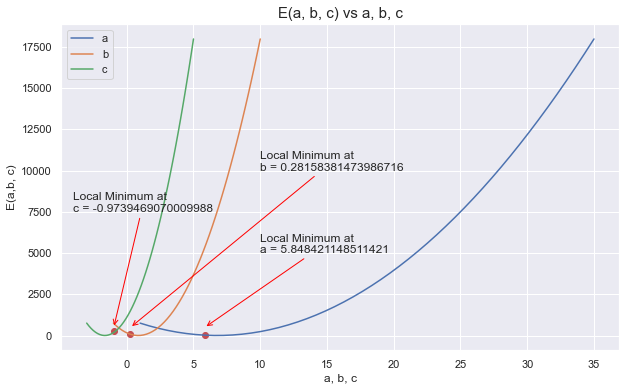

In [26]:
a_values = np.linspace(1, 35, 50) # values of a to be plotted
b_values = np.linspace(-1, 10, 50) # values of b to be plotted
c_values = np.linspace(-3, 5, 50)
error_func = [E(a, b, c) for a, b, c in zip(a_values, b_values, c_values)]

plt.figure(figsize=(10,6))

plt.plot(a_values, error_func, label='a') # plot of E(a, b) wrt a
plt.plot(b_values, error_func, label='b') # plot of E(a, b) wrt b
plt.plot(c_values, error_func, label='c') # plot of E(a, b) wrt c

plt.scatter(a, 50, color='r', alpha=1) # location of a
plt.scatter(b, 100, color='r', alpha=1) # location of b
plt.scatter(c, 250, color='r', alpha=1) # location of c

plt.annotate(text=f'Local Minimum at\na = {a}', xy=(a, 500), xytext=(10, 5000), size=12, 
                arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate(text=f'Local Minimum at\nb = {b}', xy=(b, 500), xytext=(10, 10000), size=12, 
                arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate(text=f'Local Minimum at\nc = {c}', xy=(c, 500), xytext=(-4, 7500), size=12, 
                arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('a, b, c')
plt.ylabel('E(a,b, c)')
plt.title('E(a, b, c) vs a, b, c', size=15)

plt.legend()
plt.show()

c) Describe the changes and decisions you made on the parameters for your solution to reach convergence. 

- I set the initial points to be $a=6$, $b=1$, and $c=0$ after trying different initial values as the error function would always converge around those 6, 1, and 0. Hence I chose points closer to when convergence would happen to reduce the number of iterations needed.
- $\alpha$ was set to 0.008 as values > 0.008 would not result in converge, Furthermore,setting $\alpha$ < 0.008 would increase the number of iterations till convergence.
- For the stopping criteria, I set $\epsilon=0.1$ as values $\leq0.1$ would result in slower convergence and values $\geq0.1$ would results in slower convergence or fail to converge,reaching maximum iterations. Hence, I used $E_a^{2}(a_n,b_n)+E_b^{2}(a_n,b_n) < \epsilon=0.1$ to check for convergence. 
- As for number of iterations, I set it to 1000 to account for the slower convergence due to the smaller $\alpha$ value.

### Conclusion on Multiple Linear Regression

a) David used gradient descent algorithm to find the 3 models. Next, he computed the predicted housing prices using the 3 models for all the data points in the dataset. He noticed that for one of the data points, the error of the predicted housing price in Model 1 from the actual housing price is the smallest, compared to the other 2 models. Is this possible, assuming he has done his gradient descent algorithm correctly? Explain.

- No, it is not possible. A linear regression model with a fixed y-intercept $\alpha$ such as model 1 will leave the other parameters biased toward an offset. 

- Which means that even if David used gradient descent algorithm correctly, the resulting regression line would have the tendency to land consistently offset from the origin. 

- A model with a high level of bias can lead to underfitting. This means that the regression model would be unable to capture relevant relations between predictor and response variables.

- Furthermore, after computing the root mean squared error for all 3 models with results in models 2 and 3 having significantly lower prediction errors compared to model 1.

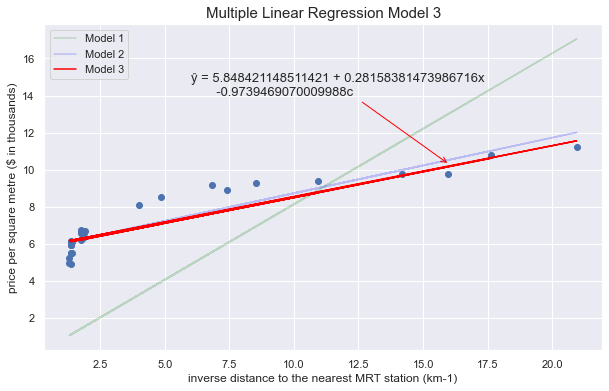

In [27]:
m3_y_hat = a + b*x + c*w # predicted values of y for each value of x and w

plt.figure(figsize=(10, 6))
plt.scatter(x, y)

plt.plot(x, m1_y_hat, color='green', alpha=.2, label='Model 1') # plot of model 1 
plt.plot(x, m2_y_hat, color='blue', alpha=.2, label='Model 2') # plot of model 2
plt.plot(x, m3_y_hat, color='red', alpha=1, label='Model 3') # plot of model 3

plt.annotate(text=f'ŷ = {a} + {b}x \n       {c}c', xy=(16, 10.3), xytext=(6, 14), size=13, 
                arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('inverse distance to the nearest MRT station (km-1)')
plt.ylabel('price per square metre ($ in thousands)')
plt.title('Multiple Linear Regression Model 3', size=15)

plt.legend()
plt.show()

In [28]:
def adj_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

model_3_rmse = rmse(y, m3_y_hat) # rmse for model 3
model_3_r2 = r_squared(y, m3_y_hat) # r2 for model 3
model_3_adj_r2 = adj_r2(model_3_r2, n, 3) # adjusted r2 for model 3

print(f"RMSE value for model 3 is: {model_3_rmse}")
print(f"Adjusted R-squared value for model 3 is: {model_3_adj_r2}")

RMSE value for model 3 is: 0.7237340292640556
Adjusted R-squared value for model 3 is: 0.8163847279930998


In [30]:
print(f"Model 1 RMSE: {model_1_rmse}")
print(f"Model 2 RMSE: {model_2_rmse}")
print(f"Model 3 RMSE: {model_3_rmse}")

Model 1 RMSE: 4.41215818210472
Model 2 RMSE: 0.6798036226030145
Model 3 RMSE: 0.7237340292640556


b) Compare the 3 models.  Which model will you use to predict housing price in this context? Explain.

- In reality, there are many factors affecting housing prices. Having a single variable to predict housing prices would not make sense even if both predictor and response are correlated as it does not imply casaution. Choosing a model with low prediction errors would also be unwise as it may be a sign of overfitting, meaning the model will not able to generalize causing inaccurate predictions on unseen data. Hence within this context, I would choose model 3 to predict housing prices.